In [ ]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df['diagnosis'] = df['target'].map({0: 'maligno', 1: 'benigno'})

df[['target', 'diagnosis']].head()

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,maligno


Acertividade com K=10: 0.98


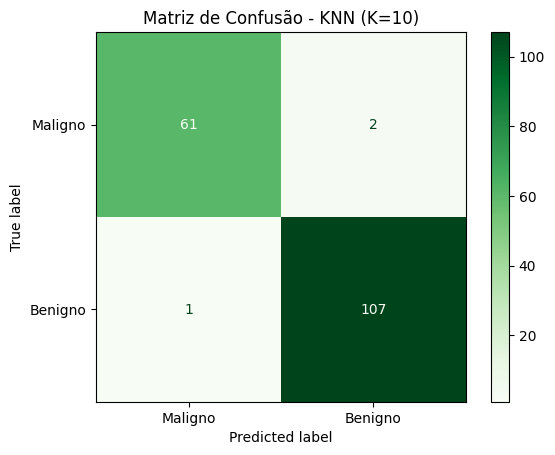

KNN (Holdout):
Acurácia: 0.98
Precisão: 0.98
Recall: 0.99
F1-score: 0.99


In [ ]:
X = df.drop(columns=['target', 'diagnosis'])  # Remova as colunas não numéricas
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(f"Acertividade com K=10: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno', 'Benigno'])
disp.plot(cmap='Greens')

plt.title("Matriz de Confusão - KNN (K=10)")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print("KNN (Holdout):")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

print(f"Precisão: {precision_score(y_test, y_pred):.2f}")

print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

Random Forest (Holdout):
Acurácia: 0.97
Precisão: 0.96
Recall: 0.99
F1-score: 0.98


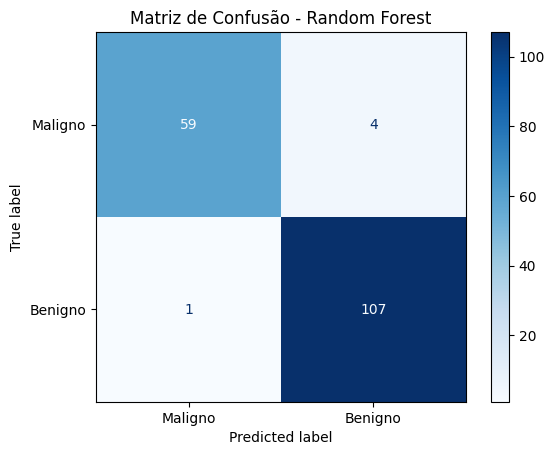

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest (Holdout):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.2f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Maligno', 'Benigno'])
disp_rf.plot(cmap='Blues')

plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_knn = cross_validate(KNeighborsClassifier(n_neighbors=10), X, y, cv=5, scoring=scoring)

cv_rf = cross_validate(RandomForestClassifier(random_state=42), X, y, cv=5, scoring=scoring)

print("KNN (Validação Cruzada):")
for m in scoring:
    print(f"{m}: {cv_knn['test_'+m].mean():.2f} ± {cv_knn['test_'+m].std():.2f}")

print("\nRandom Forest (Validação Cruzada):")
for m in scoring:
    print(f"{m}: {cv_rf['test_'+m].mean():.2f} ± {cv_rf['test_'+m].std():.2f}")

KNN (Validação Cruzada):
accuracy: 0.93 ± 0.03
precision: 0.93 ± 0.04
recall: 0.96 ± 0.02
f1: 0.95 ± 0.02

Random Forest (Validação Cruzada):
accuracy: 0.96 ± 0.02
precision: 0.96 ± 0.03
recall: 0.97 ± 0.02
f1: 0.97 ± 0.02


Melhores hiperparâmetros: {'max_depth': None, 'n_estimators': 200}
Random Forest (Ajustado e Re-treinado):
Acurácia: 0.97
Precisão: 0.96
Recall: 0.99
F1-score: 0.98


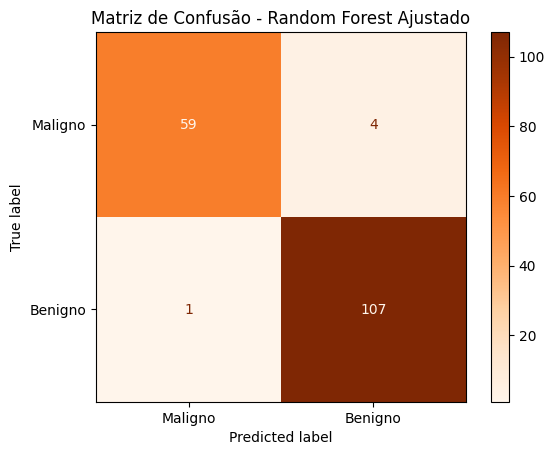

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_best_rf = best_rf.predict(X_test)

print("Random Forest (Ajustado e Re-treinado):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred_best_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf):.2f}")

print(f"F1-score: {f1_score(y_test, y_pred_best_rf):.2f}")

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['Maligno', 'Benigno'])
disp_best_rf.plot(cmap='Oranges')

plt.title("Matriz de Confusão - Random Forest Ajustado")
plt.show()

Análise Crítica dos Resultados
01. Comparando KNN e Random Forest (Holdout e Validação Cruzada):

No holdout, os dois modelos mandaram bem. O KNN teve um leve destaque, com acurácia de 0.98, precisão de 0.98, recall de 0.99 e F1-score de 0.99. Já o Random Forest ficou logo atrás, com acurácia de 0.97, precisão de 0.96, recall igual (0.99) e F1-score de 0.98. Ou seja, o KNN foi um pouquinho melhor, exceto no recall, onde os dois empataram.

Agora, na validação cruzada, o jogo virou: o Random Forest foi melhor em tudo - acurácia (0.96 contra 0.93), precisão (0.96 contra 0.93), recall (0.97 contra 0.96) e F1-score (0.97 contra 0.95). Além disso, teve menor variação nos resultados, o que mostra que é um modelo mais estável.

Depois do ajuste de hiperparâmetros, o Random Forest manteve os mesmos resultados no holdout, mostrando que já estava bem afinado desde o início.

02. Qual modelo escolher (foco em recall e F1-score):

Mesmo o KNN tendo ido um pouco melhor no holdout, o Random Forest foi mais estável e consistente na validação cruzada - que é uma forma mais confiável de testar o modelo. Como estamos lidando com um problema da área médica, onde errar pode custar caro (especialmente os falsos negativos), o Random Forest acaba sendo a melhor escolha. Ele teve recall e F1-score iguais ou melhores, então é o mais seguro.

03. Pontos fortes e fracos dos modelos:

Random Forest: É um modelo bem robusto, aguenta melhor dados com ruído ou desbalanceados e costuma manter um desempenho estável. Dá pra ajustar bem ele com os hiperparâmetros, mas em compensação, pode ser mais pesado e um pouco mais difícil de entender.

KNN: Super simples e fácil de usar, mas pode sofrer bastante se os dados estiverem desbalanceados ou com muito ruído. Também não lida muito bem com conjuntos de dados grandes e a escolha do valor de K pode fazer bastante diferença no resultado.

04. O que mudou com o ajuste de hiperparâmetros no Random Forest:

Na prática, o ajuste de hiperparâmetros não mudou muito o desempenho do Random Forest no holdout. Isso mostra que o modelo já estava bem calibrado. Mesmo assim, fazer esse ajuste é importante pra garantir que você está tirando o melhor possível do modelo.

Conclusão:

No fim das contas, o Random Forest é a melhor opção pra esse problema. Ele foi mais consistente, teve ótimo desempenho e se destacou nas métricas que mais importam no contexto médico. Além disso, é mais confiável em diferentes cenários. Então, entre os dois, é ele que leva a melhor.